In [1]:
import pickle
import numpy as np

f=open("/media/maria/DATA/BrainObservatoryProcessedData/openai_clip-vit-base-patch32_embeddings.pkl",'rb')
currents=pickle.load(f)['natural_movie_one']
mn=np.min(currents)
print(mn)
currents=currents+(-mn)
print(np.max(currents))

-12.493422508239746
17.570687294006348


In [2]:
print(currents.shape)

(900, 768)


In [3]:
from brian2 import *

start_scope()
#stimulus = TimedArray(np.tile([100., 0.], 5)*Hz, dt=100.*ms)
stimulus=TimedArray(currents[:,0]*Hz, dt=10.*ms)
P = PoissonGroup(100, rates='stimulus(t)')

M = SpikeMonitor(P)

run(1000*ms) 

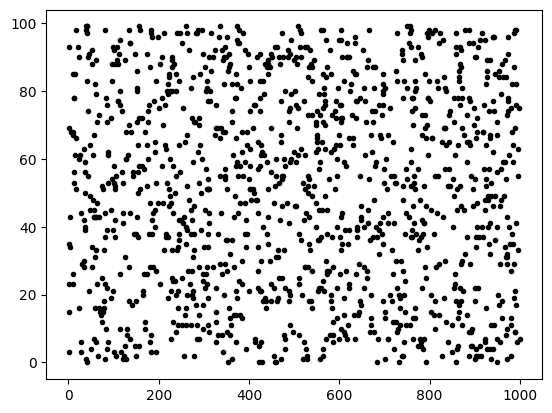

In [4]:
plot(M.t/ms, M.i, '.k')

In [5]:
print(stimulus)

In [6]:
print(len(M.i))
print(len(M.t))

1274
1274


In [7]:
M.t

<spikemonitor.t: array([5.000e-01, 9.000e-01, 1.400e+00, ..., 9.970e+02, 9.971e+02,
       9.994e+02]) * msecond>

In [8]:
from convenience_functions import bin_spikes

my_ts=bin_spikes(M, 100,1000,10)

[0.0412 0.3543 0.4211 0.4281 0.4572 0.4606 0.6825 0.7313 0.7913 0.8595
 0.9501] ks
[0.04   0.0814 0.1215 0.1286 0.3619 0.4702 0.5203 0.5282 0.557  0.701
 0.9016 0.9369 0.9707] ks
[0.0653 0.1057 0.1226 0.1489 0.2563 0.2792 0.4552 0.5289 0.5636 0.7385
 0.7417 0.8279 0.8874 0.902  0.9083 0.9138 0.98  ] ks
[  0.9  27.4  99.9 115.5 183.3 193.9 341.5 848.9] s
[0.0497 0.0852 0.3937 0.4788 0.5256 0.564  0.721  0.7852 0.8611 0.9019
 0.9281 0.9335 0.9406] ks
[0.1246 0.1465 0.156  0.4231 0.7738 0.7805 0.8641 0.8922 0.8936 0.9115] ks
[0.0285 0.0602 0.0886 0.1801 0.3276 0.3709 0.4137 0.4262 0.5223 0.5869
 0.7443 0.7813 0.8409 0.9232 0.9553 0.9938] ks
[0.0558 0.1354 0.2274 0.2846 0.2895 0.4123 0.4803 0.5703 0.6005 0.618
 0.6351 0.685  0.7083 0.7086 0.7632 0.7787 0.7883 0.9223 0.9489 0.9994] ks
[0.1301 0.1823 0.3321 0.3401 0.3579 0.4769 0.5103 0.5792 0.5856 0.6117
 0.9688] ks
[0.2389 0.3117 0.3503 0.4974 0.6115 0.6673 0.6766 0.7281 0.8881 0.8925
 0.9883 0.9884] ks
[0.0841 0.1146 0.1294 0.1693 0.2979 

In [9]:
my_ts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [10]:
my_ts[1].shape

(99,)

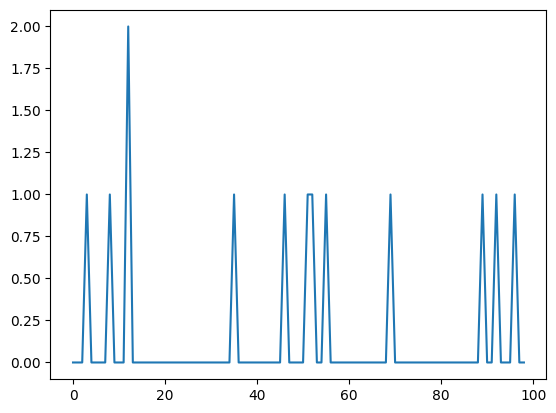

In [12]:
import matplotlib.pyplot as plt

plt.plot(my_ts[1])

In [16]:
from sklearn.decomposition import PCA
%matplotlib qt
pcs=PCA(n_components=3).fit_transform(my_ts.T)
print(pcs.shape)
# Create a 3D PCA plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot features for natural movie sequence
ax.scatter(
    pcs[:, 0],
    pcs[:, 1],
    pcs[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

(99, 3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
